<a href="https://colab.research.google.com/github/dineshb302/text-classification-finetuning/blob/main/fine-tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# start
import pandas as pd
df = pd.read_excel("/content/Dataset for NLP Group Project - Group 13.xlsx")
df.head()

,Resp ID,Wave,Retail investor category,Q1. How do you feel about the current economic market right now?,"Q1a. Why do you feel ""text mentioned in Q1” about the current economic market right now?",Sum (Number of bucekts classified in),Rising prices/Inflation,Economic uncertainty/slow down,GeoPolitical conflicts/Wars,Volatile stock market,...,Personal Finance related/Financial uncertainty/Asset value risk,General anxious/Troubling news,Do not have enough knowledge of finances,Pandemic/Covid related,Economy/GDP/Inflation Improving,Strong Personal finance/Financially secure/Diversified portfolio,Stock market is stable/improving,Generally Optimistic,No comments/Not sure/Don't know,Others
0,S706RpBoxUfdED3zNqR0fw**,May,Prospect,Somewhat anxious,no comment,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,S706RpBoxUfi93YZa8cqkg**,May,Prospect,A little anxious,Because their will be recession recently accor...,2,NaN,NaN,NaN,NaN,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S706RpBoxUfPMaqrY6ZbKw**,May,Prospect,Somewhat anxious,A lot of unrest and somewhat uncharted territo...,3,NaN,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S706RpBoxUfSQu3XvtmOhw**,May,Customer,A little anxious,Because the economy is not stable lately,1,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S706RpBoxUdzwDc3-LF0SA**,May,Customer,A little anxious,Could have war in Europe againl.,1,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# prompt: get count of nan in all columns

df.isnull().sum()


Resp ID                                                                                        0
Wave                                                                                           0
Retail investor category                                                                       0
Q1. How do you feel about the current economic market right now?                               0
Q1a. Why do you feel "text mentioned in Q1” about the current economic market right now?       6
Sum (Number of bucekts classified in)                                                          0
Rising prices/Inflation                                                                     1791
Economic uncertainty/slow down                                                              1971
GeoPolitical conflicts/Wars                                                                 2136
Volatile stock market                                                                       2113
Government Policies/Immigratio

In [4]:
# prompt: replace all nan with 0

df.fillna(0, inplace=True)
df.isnull().sum()


Resp ID                                                                                     0
Wave                                                                                        0
Retail investor category                                                                    0
Q1. How do you feel about the current economic market right now?                            0
Q1a. Why do you feel "text mentioned in Q1” about the current economic market right now?    0
Sum (Number of bucekts classified in)                                                       0
Rising prices/Inflation                                                                     0
Economic uncertainty/slow down                                                              0
GeoPolitical conflicts/Wars                                                                 0
Volatile stock market                                                                       0
Government Policies/Immigration/Upcoming Presidential electi

In [7]:
# prompt: print data type of all columns

print(df.dtypes)


Resp ID                                                                                     object
Wave                                                                                        object
Retail investor category                                                                    object
Q1. How do you feel about the current economic market right now?                            object
Q1a. Why do you feel "text mentioned in Q1” about the current economic market right now?    object
Sum (Number of bucekts classified in)                                                        int64
Rising prices/Inflation                                                                     object
Economic uncertainty/slow down                                                              object
GeoPolitical conflicts/Wars                                                                 object
Volatile stock market                                                                       object
Government

In [8]:
# prompt: rename coulmn 'No comments/Not sure/Don't know'

df.rename(columns={'No comments/Not sure/Don\'t know': 'No_comments'}, inplace=True)
df.head()


,Resp ID,Wave,Retail investor category,Q1. How do you feel about the current economic market right now?,"Q1a. Why do you feel ""text mentioned in Q1” about the current economic market right now?",Sum (Number of bucekts classified in),Rising prices/Inflation,Economic uncertainty/slow down,GeoPolitical conflicts/Wars,Volatile stock market,...,Personal Finance related/Financial uncertainty/Asset value risk,General anxious/Troubling news,Do not have enough knowledge of finances,Pandemic/Covid related,Economy/GDP/Inflation Improving,Strong Personal finance/Financially secure/Diversified portfolio,Stock market is stable/improving,Generally Optimistic,No_comments,Others
0,S706RpBoxUfdED3zNqR0fw**,May,Prospect,Somewhat anxious,no comment,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,S706RpBoxUfi93YZa8cqkg**,May,Prospect,A little anxious,Because their will be recession recently accor...,2,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,S706RpBoxUfPMaqrY6ZbKw**,May,Prospect,Somewhat anxious,A lot of unrest and somewhat uncharted territo...,3,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,S706RpBoxUfSQu3XvtmOhw**,May,Customer,A little anxious,Because the economy is not stable lately,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,S706RpBoxUdzwDc3-LF0SA**,May,Customer,A little anxious,Could have war in Europe againl.,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# prompt: get all unique values of last 5 columns

unique_values = {}
for col in df.columns[-18:]:
  unique_values[col] = df[col].unique()

print(unique_values)


{'Strong Personal finance/Financially secure/Diversified portfolio': array([0, 1, ' '], dtype=object), 'Stock market is stable/improving': array([0, 1, ' '], dtype=object), 'Generally Optimistic': array([0, 1, ' '], dtype=object), 'No_comments': array([1, 0, ' '], dtype=object), 'Others': array([0, 1, ' '], dtype=object)}


In [15]:
# prompt: for last 18 columns convert ' ' or '\\' to 0

for col in df.columns[-18:]:
  df[col] = df[col].replace([' ', '\\'], 0)


In [16]:
unique_values = {}
for col in df.columns[-18:]:
  unique_values[col] = df[col].unique()

print(unique_values)

{'Rising prices/Inflation': array([0, 1]), 'Economic uncertainty/slow down': array([0, 1]), 'GeoPolitical conflicts/Wars': array([0, 1]), 'Volatile stock market': array([0, 1]), 'Government Policies/Immigration/Upcoming Presidential elections': array([0, 1]), 'High Interest rate': array([0, 1]), 'Recession': array([0, 1]), 'Increasing unemployment/job market': array([0, 1]), 'Personal Finance related/Financial uncertainty/Asset value risk': array([0, 1]), 'General anxious/Troubling news': array([0, 1]), 'Do not have enough knowledge of finances': array([0, 1]), 'Pandemic/Covid related': array([0, 1]), 'Economy/GDP/Inflation Improving': array([0, 1]), 'Strong Personal finance/Financially secure/Diversified portfolio': array([0, 1]), 'Stock market is stable/improving': array([0, 1]), 'Generally Optimistic': array([0, 1]), 'No_comments': array([1, 0]), 'Others': array([0, 1])}


<Axes: >

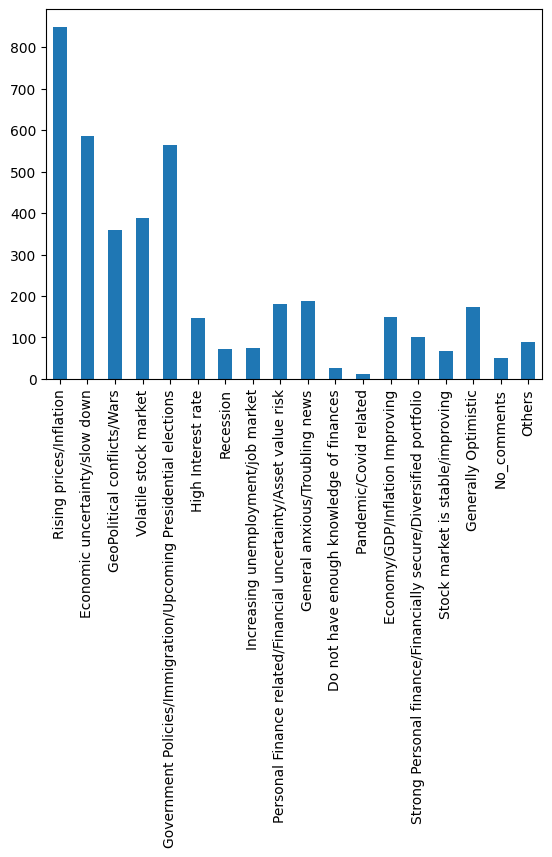

In [17]:
attributes = ['Rising prices/Inflation', 'Economic uncertainty/slow down','GeoPolitical conflicts/Wars','Volatile stock market',
              'Government Policies/Immigration/Upcoming Presidential elections','High Interest rate','Recession','Increasing unemployment/job market',
              'Personal Finance related/Financial uncertainty/Asset value risk','General anxious/Troubling news','Do not have enough knowledge of finances',
              'Pandemic/Covid related','Economy/GDP/Inflation Improving','Strong Personal finance/Financially secure/Diversified portfolio',
              'Stock market is stable/improving','Generally Optimistic','No_comments','Others'
              ]

df[attributes].sum().plot.bar()